In [18]:
import deepxde as dde
from deepxde.backend import tf
import numpy as np
import matplotlib.pyplot as plt

In [19]:
k = 0.4
L = 1
n = 1

In [20]:
geom = dde.geometry.Interval(0,L)
timedomain  = dde.geometry.TimeDomain(0,n)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

In [21]:
ic = dde.icbc.IC(geomtime, lambda x: np.sin(n * np.pi * x[:, 0:1]/L), lambda _, on_initial: on_initial)

In [22]:
input_array = np.array([[1,2,3],
                        [4,5,6],
                        [7,8,9]])

lambda_function = lambda x: 2*x[:, 0:1]

result_array = lambda_function(input_array)

print(result_array)

[[ 2]
 [ 8]
 [14]]


In [23]:
cond_lambda = lambda x: "Even" if x%2 == 0 else "Odd"
print(cond_lambda(4))
print(cond_lambda(3))

Even
Odd


In [24]:
def double_first_column(input_array):
    return 2 * input_array[:, 0:1]

bc = dde.icbc.DirichletBC(geomtime, lambda input_array: double_first_column(input_array), lambda _, on_boundary: on_boundary) 

In [25]:
def pde(comp,u):
    du_t = dde.grad.jacobian(u,comp, i=0,j=1)
    du_xx = dde.grad.hessian(u,comp, i=0,j=0)
    return du_t - k * du_xx

In [26]:
data = dde.data.TimePDE(geomtime,
                        pde,
                        [bc,ic],
                        num_domain= 2540,
                        num_boundary = 80,
                        num_initial= 160,
                        num_test= 2540,
                        ) 

In [27]:
net = dde.nn.FNN([2] + [20]*3 + [1], "tanh", "Glorot normal")

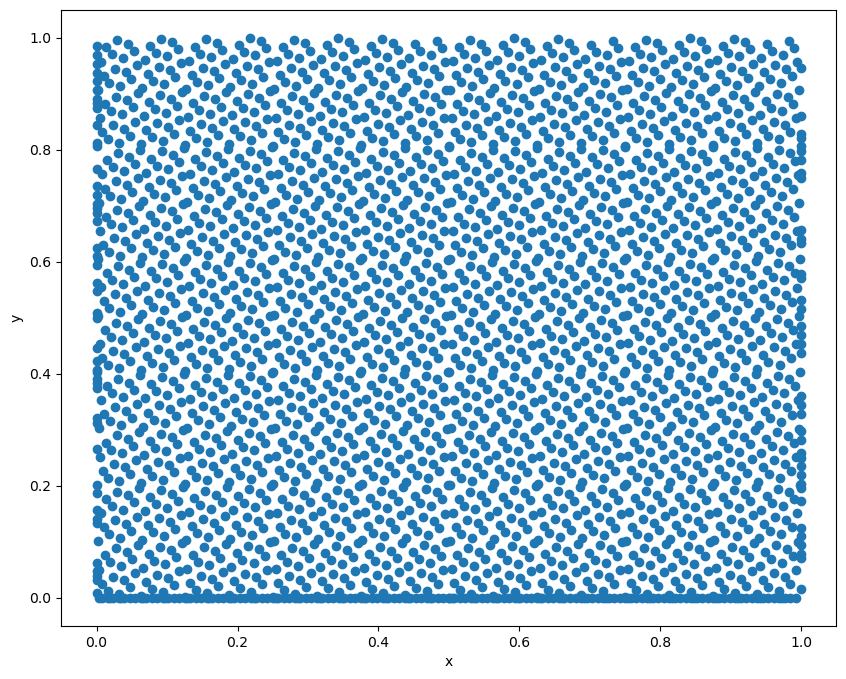

In [28]:
plt.figure(figsize = (10,8))
plt.scatter(data.train_x_all[:,0], data.train_x_all[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [29]:
model = dde.Model(data, net)

In [30]:
model.compile("adam", lr=1e-3)

Compiling model...
Building feed-forward neural network...
'build' took 0.259532 s

'compile' took 0.989714 s



In [31]:
losshistory, train_state = model.train(iterations=15000)

Training model...

0         [4.01e-01, 1.22e+00, 3.56e-01]    [4.00e-01, 1.22e+00, 3.56e-01]    []  
1000      [9.09e-03, 4.91e-02, 9.69e-02]    [5.76e-03, 4.91e-02, 9.69e-02]    []  
2000      [4.43e-03, 2.15e-02, 9.09e-03]    [3.36e-03, 2.15e-02, 9.09e-03]    []  
3000      [2.56e-03, 1.56e-02, 6.11e-03]    [1.73e-03, 1.56e-02, 6.11e-03]    []  
4000      [1.80e-03, 1.28e-02, 5.12e-03]    [1.16e-03, 1.28e-02, 5.12e-03]    []  
5000      [1.54e-03, 1.10e-02, 4.72e-03]    [9.95e-04, 1.10e-02, 4.72e-03]    []  
6000      [1.48e-03, 9.56e-03, 4.35e-03]    [9.90e-04, 9.56e-03, 4.35e-03]    []  
7000      [1.43e-03, 8.34e-03, 3.95e-03]    [9.93e-04, 8.34e-03, 3.95e-03]    []  
8000      [1.46e-03, 7.23e-03, 3.48e-03]    [1.09e-03, 7.23e-03, 3.48e-03]    []  
9000      [1.38e-03, 6.12e-03, 3.09e-03]    [1.11e-03, 6.12e-03, 3.09e-03]    []  
10000     [1.39e-03, 5.18e-03, 2.70e-03]    [1.17e-03, 5.18e-03, 2.70e-03]    []  
11000     [1.39e-03, 4.39e-03, 2.40e-03]    [1.19e-03, 4.39e-03, 2.4

In [32]:
model.compile("L-BFGS-B")
losshistory, train_state = model.train()

Compiling model...
'compile' took 1.711911 s

Training model...

Step      Train loss                        Test loss                         Test metric
15000     [1.28e-03, 2.33e-03, 1.77e-03]    [1.05e-03, 2.33e-03, 1.77e-03]    []  

INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.005379
  Number of iterations: 1
  Number of functions evaluations: 27
15027     [1.28e-03, 2.33e-03, 1.77e-03]    [1.05e-03, 2.33e-03, 1.77e-03]    []  

Best model at step 15000:
  train loss: 5.38e-03
  test loss: 5.15e-03
  test metric: []

'train' took 2.755484 s



Saving loss history to c:\Users\ok\Downloads\DL\loss.dat ...
Saving training data to c:\Users\ok\Downloads\DL\train.dat ...
Saving test data to c:\Users\ok\Downloads\DL\test.dat ...


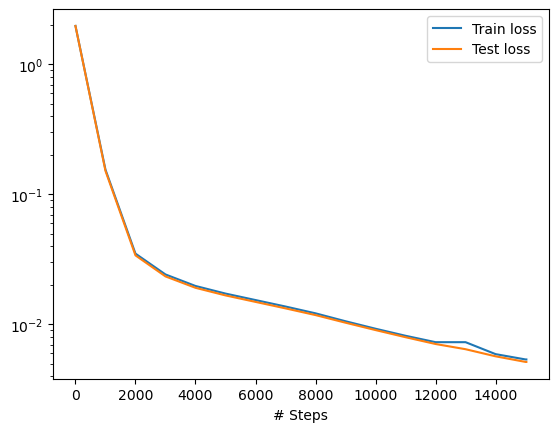

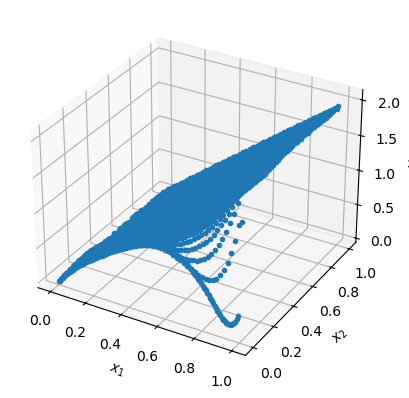

In [33]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)